In [69]:
import pandas as pd
import numpy as np
import math

from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, train_test_split

from sklearn.metrics import accuracy_score
import seaborn as sb



In [111]:
train = pd.read_csv('.ipynb_checkpoints/test_titanic.csv')
test = pd.read_csv('.ipynb_checkpoints/train-titanic.csv')
len_train = len(train)
print(len_train)
df_all = pd.concat([train, test]).reset_index(drop=True)
print(df_all)

3
   PassengerId  Pclass                                               Name  \
0           10       3                                   Kelly, Mr. James   
1           11       3                   Wilkes, Mrs. James (Ellen Needs)   
2           12       2                          Myles, Mr. Thomas Francis   
3            1       3                            Braund, Mr. Owen Harris   
4            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
5            3       3                             Heikkinen, Miss. Laina   

      Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  \
0    male  34.5      0      0            330911   7.8292   NaN        Q   
1  female  47.0      1      0            363272   7.0000   NaN        S   
2    male  62.0      0      0            240276   9.6875   NaN        Q   
3    male  22.0      1      0         A/5 21171   7.2500   NaN        S   
4  female  38.0      1      0          PC 17599  71.2833   C85        C   
5  femal

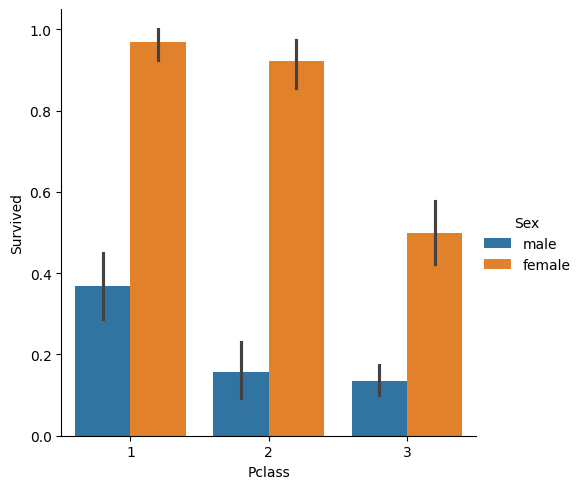

In [91]:
sb.catplot(df_all, x='Pclass', y='Survived', kind='bar', hue='Sex')

The median of the age is 28.0


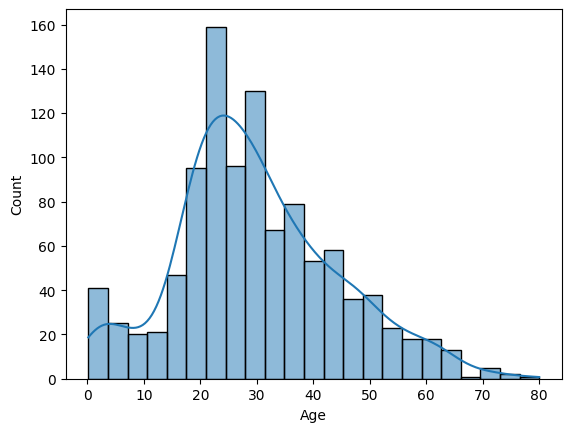

In [92]:
sb.histplot(df_all['Age'], kde=True)
print(f'The median of the age is {df_all.Age.median()}')

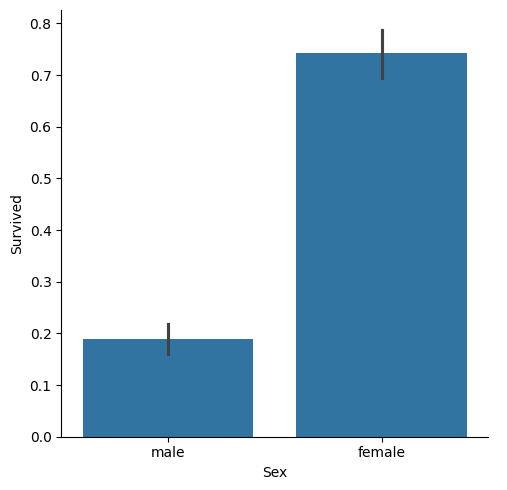

In [93]:
sns.catplot(df_all, x='Sex', y='Survived', kind='bar')

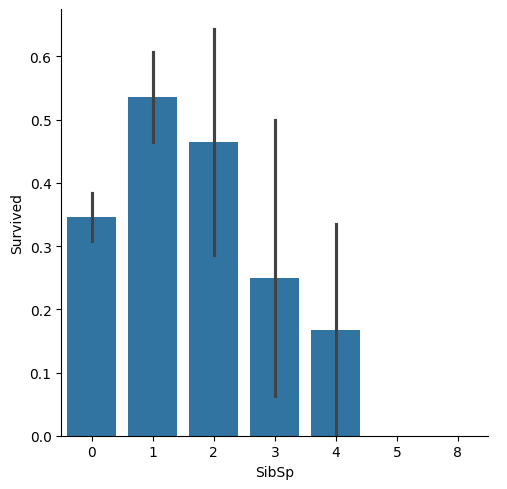

In [97]:
sb.catplot(df_all, x='SibSp', y='Survived', kind='bar')

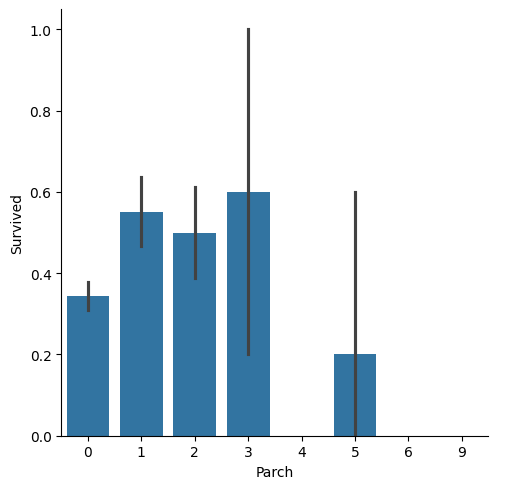

In [99]:
sb.catplot(df_all, x='Parch', y='Survived', kind='bar')

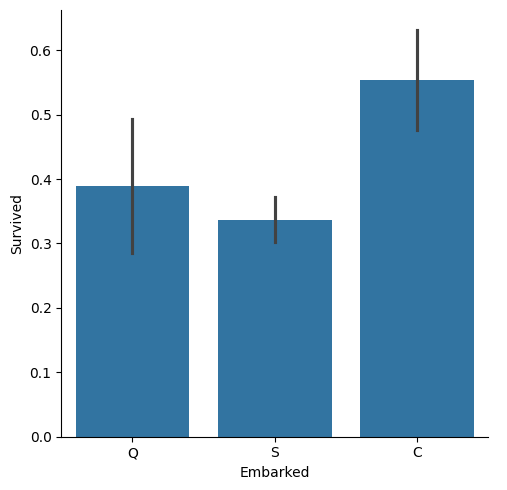

In [100]:
sns.catplot(df_all, x='Embarked', y='Survived', kind='bar')

In [112]:
df_all['Embarked'] = df_all['Embarked'].fillna('S')
print(df_all['Embarked'])
df_all['Fare'] = df_all['Fare'].fillna(df_all['Fare'].mean())
print(df_all['Fare'])
for i in range(len(df_all)):
    if math.isnan(df_all.loc[i, 'Age']):
        print(math.isnan(df_all.loc[i, 'Age']))
        sex = df_all.loc[i, 'Sex']
        print(sex)
        pclass = df_all.loc[i, 'Pclass'] - 1
        age_to_input = df_all.groupby(['Sex', 'Pclass'])['Age'].median()[[sex]].iloc[pclass]
        df_all.loc[i, 'Age'] = age_to_input

0    Q
1    S
2    Q
3    S
4    C
5    S
Name: Embarked, dtype: object
0     7.8292
1     7.0000
2     9.6875
3     7.2500
4    71.2833
5     7.9250
Name: Fare, dtype: float64


In [114]:
df_all['Family_Size'] = df_all['Parch'] + df_all['SibSp']
df_all['last_name'] = df_all['Name'].apply(lambda x: str.split(x, ",")[0])

DEFAULT_SURVIVAL_VALUE = 0.5
df_all['Family_Survival'] = DEFAULT_SURVIVAL_VALUE
print(df_all['Family_Survival'])

0    0.5
1    0.5
2    0.5
3    0.5
4    0.5
5    0.5
Name: Family_Survival, dtype: float64


In [ ]:
for grp, grp_df in df_all[['Survived', 'Name', 'last_name', 'Fare', 'Ticket', 'PassengerId', 'SibSp', 'Parch', 'Age', 'Cabin']].groupby(['last_name', 'Fare']):
    if (len(grp_df) != 1):
        for ind, row in grp_df.iterrows():
            smax = grp_df.drop(ind)['Survived'].max()
            smin = grp_df.drop(ind)['Survived'].min()
            passID = row['PassengerId']
            if (smax == 1.0):
                print(passID, "Survived")
            elif (smin == 0.0):
                df_all.loc[df_all['PassengerId'] == passID, 'Family_Survival'] = 0 

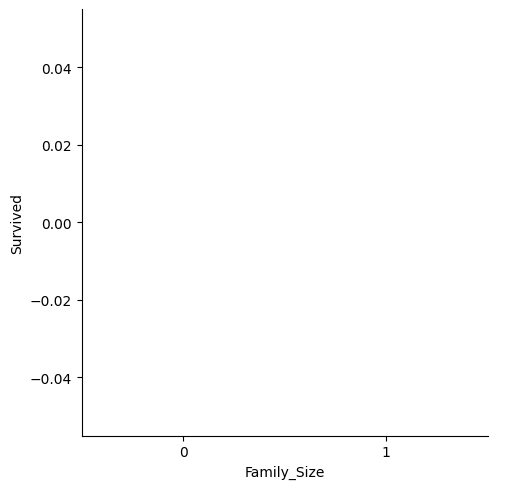

In [119]:
sb.catplot(x="Family_Size",y="Survived",data = df_all.iloc[:len_train],kind="bar")

In [120]:
label = LabelEncoder()

NameError: name 'LabelEncoder' is not defined

In [121]:
df_all['Fare'] = pd.qcut(df_all['Fare'], 5)
df_all['Fare'] = label.fit_transform(df_all['Fare'])

df_all['Age'] = pd.qcut(df_all['Age'], 4)
df_all['Age'] = label.fit_transform(df_all['Age'])

df_all['Sex'] = df_all['Sex'].replace(['male', 'female'], [0,1])

NameError: name 'label' is not defined

In [123]:
x_all = df_all.drop(['PassengerId', 'Survived', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked', 'last_name'],axis=1)

x = x_all[:len_train]
x_test = x_all[len_train:]



In [ ]:
results_valid = cat_clf_best.predict(x_valid)
print(accuracy_score(y_valid, results_valid))
final_results = cat_clf_best.predict(x_test)
df_all.loc[len_train:,'PassengerId']
for_submission = pd.DataFrame(columns=['PassengerId', 'Survived'])
for_submission['PassengerId'] = df_all.loc[len_train:,'PassengerId']
for_submission['Survived'] = final_results
for_submission.to_csv('/output.csv', index=False)

In [ ]:
import csv
from datasets import load_dataset

# Login using e.g. `huggingface-cli login` to access this dataset
ds = load_dataset("prithivMLmods/Spam-Text-Detect-Analysis")
# print(ds.column_names)
# print(ds.data)
import collections
counter = collections.defaultdict(int)
for row in ds:
    counter[row[0]] += 1
    # print(row)

writer = csv.writer(open('.ipynb_checkpoints/spam-datasets.csv', 'w'))
for row in ds:
    print(row)
    if counter[row[0]] >= 4:
        writer.writerow(row)